### Library Explanations:

- **Pandas (pd):**
  - Pandas is a powerful data manipulation that offers data structures and operations for manipulating numerical tables.
  
- **Matplotlib.pyplot (plt):**
  - Matplotlib is a plotting library.
  
- **Seaborn (sns):**
  - Seaborn is a Python data visualization library based on Matplotlib and provides a high-level interface for drawing attractive statistical graphs.
  
- **Regular Expression (re):**
  - Regular expressions or regex for short, are sequences of characters that define a search pattern and this is mainly for use in pattern matching with strings.
  
- **Collections.Counter:**
  - Counter is a dict subclass for counting hashable objects.
  
- **NLTK (Natural Language Toolkit):**
  - NLTK is a platform for building programs to work with human language data. It's generally used for text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
  
- **NLTK.corpus.Stopwords:**
  - NLTK's Stopwords module provides access to a list of common stopwords for various languages, which are words that are considered insignificant for analysis.
  
- **NLTK.tokenize.Word_tokenize:**
  - Word tokenization is the process of splitting text into individual words.
  
- **NLTK.stem.PorterStemmer:**
  - Stemming is the process of reducing words to their word stem or root form. (helper/helping --> help)
  
- **String:**
  - The string module provides various string manipulation operations and constants.
  
- **TextBlob:**
  - TextBlob is another natural language processing (NLP) library for processing textual data.
  
- **Nltk.download('punkt'):**
  - Downloads the required data for NLTK's tokenization module.
  
- **Nltk.download('stopwords'):**
  - Downloads the required data for NLTK's stopwords module.
  
- **Seaborn.set():**
  - Sets the aesthetic style of the plots generated by Seaborn.
  
- **Warnings:**
  - The warnings module provides a way to handle warnings issued by a Python program. Here, we are filtering out certain types of warnings to ensure a cleaner output during execution.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize         # Word tokenization rather than sentences
from nltk.stem import PorterStemmer             # For stemming the words
import string
# Performing sentiment analysis (to track neg. & pos. sentiment expressed in each tweet)
from textblob import TextBlob
# Downloading the resources
nltk.download('punkt')
nltk.download('stopwords')
sns.set()
import warnings
# Filter out FutureWarnings that aren't need for a cleaner view
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing Dataset

We are importing a dataset named "tweet_data.csv" which contains Twitter data for analysis. Here's a brief overview of the dataset:

- **File Format**: CSV (Comma-Separated Values)
- **Encoding**: ISO-8859-1

#### Data Description:

The dataset comprises over 25,000+ records with the following columns:

1. **_unit_id**: Unique identifier for each record.
2. **_golden**: Indicates if the record is golden (TRUE/FALSE).
3. **_unit_state**: Indicates the state of the unit (e.g., finalized).
4. **_trusted_judgments**: Number of trusted judgments.
5. **_last_judgment_at**: Timestamp of the last judgment.
6. **gender**: Gender of the user.
7. **gender:confidence**: Confidence level for gender classification.
8. **profile_yn**: Indicates if the profile is present (yes/no).
9. **profile_yn:confidence**: Confidence level for profile presence classification.
10. **created**: Timestamp of profile creation.
11. **description**: User profile description.
12. **fav_number**: Number of favorites.
13. **gender_gold**: Gender annotation in gold standard.
14. **link_color**: Color of the link.
15. **name**: User's name.
16. **profile_yn_gold**: Profile presence annotation in gold standard.
17. **profileimage**: Profile image URL.
18. **retweet_count**: Number of retweets.
19. **sidebar_color**: Color of the sidebar.
20. **text**: Tweet text.
21. **tweet_coord**: Coordinates of the tweet.
22. **tweet_count**: Total tweet count.
23. **tweet_created**: Timestamp of tweet creation.
24. **tweet_id**: Unique identifier for each tweet.
25. **tweet_location**: Location of the tweet.
26. **user_timezone**: User timezone.

#### Data Exploration:

Upon importing the dataset, we performed the following initial exploratory steps:

- Checked the data information using **data.info()**.
- Viewed the first few entries using **data.head()**.
- Checked for any null values using **data.isnull().sum()**.
- Fetched statistical summary of the data using **data.describe()**.

The dataset provides valuable insights into Twitter user profiles and tweet characteristics, simplifies further analysis and exploration of social media trends.

In [160]:
data = pd.read_csv("tweet_data.csv", encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [161]:
# Viewing the first few entries
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [162]:
# Checking to see if there are any null values
data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7485
user_timezone             7798
dtype: int64

In [163]:
# Fetching for a statistics summary of the data
data.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


### Preprocessing Data

In this section, we perform preprocessing on the imported dataset to prepare it for further analysis. Below are the steps involved in the preprocessing process:

#### Dropping Unnecessary Columns

We start by dropping unnecessary columns from the dataset that are not relevant to our analysis. These columns include identifiers, confidence levels, timestamps, and other metadata. After dropping these columns, we check the dataset's information to ensure the columns have been removed successfully.

#### Handling Missing Values

Next, we handle missing values in columns containing textual data (`gender`, `description`, `tweet_location`). We fill these missing values with 'None' to indicate the absence of information. Additionally, we discovered that the `gender` column contains 'unknown' values, which we replace with 'None' as it seems equivalent to being undecided or not set.

#### Text Preprocessing

We then perform text preprocessing on the `text` column to standardize the textual data for analysis. The preprocessing steps include:
- Converting text to lowercase to ensure consistency.
- Tokenizing text into individual words.
- Removing punctuation and stop words (commonly occurring words that carry little semantic meaning).
- Stemming the words to their root form using the Porter Stemmer algorithm.

After preprocessing, we create a new column `preprocessed_text` containing the preprocessed version of the text.

In [164]:
# Dropping unnecessary columns
columns_to_drop = ['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 'created', 'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage', 'sidebar_color', 'tweet_coord', 'tweet_id', 'user_timezone']

data = data.drop(columns=columns_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          19953 non-null  object
 1   description     16306 non-null  object
 2   fav_number      20050 non-null  int64 
 3   retweet_count   20050 non-null  int64 
 4   text            20050 non-null  object
 5   tweet_count     20050 non-null  int64 
 6   tweet_created   20050 non-null  object
 7   tweet_location  12565 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.2+ MB


In [165]:
# Filling columns containing null values with 'None'
null_column = ['gender', 'description', 'tweet_location']
data[null_column] = data[null_column].fillna('None')

# Discoverd that the gender column contains 'unknown' so replacing with 'None' as it seems to be equivalent to being undecided/None set
# Replacing 'unknown' with 'None' in the 'gender' column
data['gender'].replace('unknown', 'None', inplace=True)

In [166]:
# Making sure all is good
data.isnull().sum()

gender            0
description       0
fav_number        0
retweet_count     0
text              0
tweet_count       0
tweet_created     0
tweet_location    0
dtype: int64

In [167]:
# Checking what we're left with
data.head()

,gender,description,fav_number,retweet_count,text,tweet_count,tweet_created,tweet_location
0,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,main; @Kan1shk3
1,male,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,10/26/15 12:40,None
2,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,clcncl
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,10/26/15 12:40,"Palo Alto, CA"
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,None


In [168]:
import nltk
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))    # Set of English stopwords
punctuation = set(string.punctuation)           # Set of punctuation chars

# Function for text preprocessing
def preprocess_text(text):
    # Converting text to lowercase to ensure consistency
    text = text.lower()
    
    # Tokenizing text
    tokens = word_tokenize(text)
   
    # Removing punctuation
    tokens = [word for word in tokens if word not in punctuation]
    
    # Removeing the stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Data Visualization and Analysis

In this section, we perform data visualization and analysis on the preprocessed dataset to gain insights into tweet counts, sentiment distribution, and trending words.

#### Tweet Count by Gender

We start by plotting the tweet count by gender. This bar plot shows the distribution of tweets across different genders in the dataset. Each bar represents the count of tweets for a particular gender, with the number displayed above each bar.

#### Sentiment Distribution

Next, we visualize the distribution of sentiment polarity in the tweets. This histogram shows the frequency distribution of sentiment polarity values, indicating the overall sentiment expressed in the tweets.

#### Trending Words Detection

We then detect trending words or patterns based on the tweets' descriptions. We preprocess the text using NLTK by tokenizing, removing punctuation, stop words, and performing stemming. Using a specified threshold, we identify words that appear frequently enough to be considered trends. We plot the top 10 trending words in a bar chart to visualize their frequency.

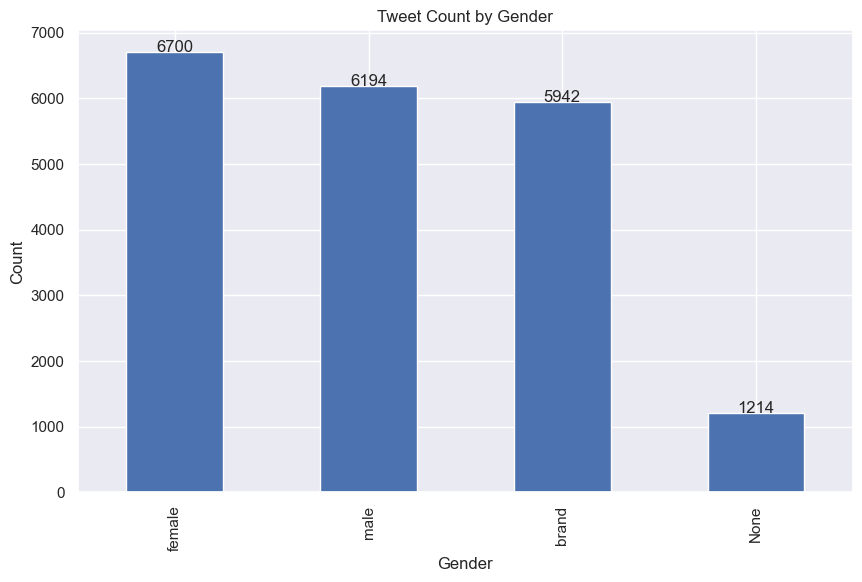

In [169]:
# Plotting tweet count by gender
plt.figure(figsize=(10, 6))
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Tweet Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding the num of tweet per column label
for i, count in enumerate(gender_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

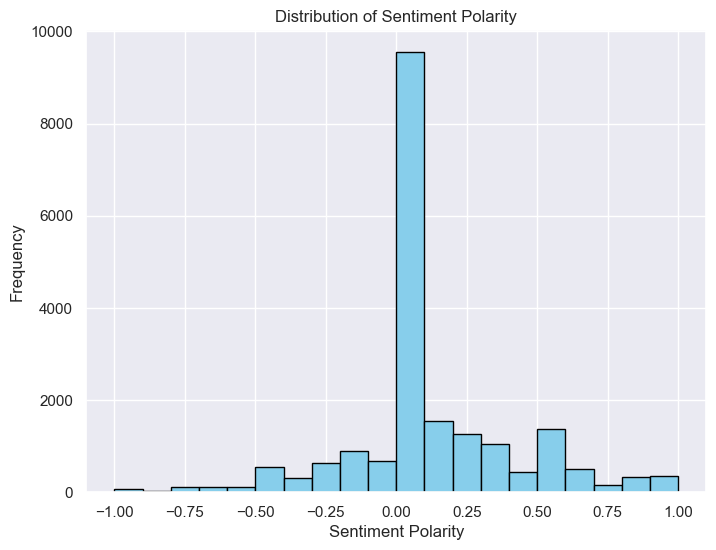

In [170]:
data['sentiment'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualizing sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [171]:
def extract_words(tweet):
    # Extract words from a tweet.
    words = re.findall(r'\b\w+\b', str(tweet).lower())
    return words

def detect_trends(tweets, threshold=3, ignore_list=None):
    """
    Detect trends or patterns based on tweets.

    Args:
    - tweets: List of tweets (strings).
    - threshold: Minimum count for a word to be considered a trend.
    - ignore_list: List of words to ignore in trend detection.

    Returns:
    - List of tuples containing trending words and their counts, ordered from highest count to lowest count.
    """
    all_words = []
    ignore_list = ignore_list or []

    for tweet in tweets:
        words = extract_words(tweet)
        all_words.extend(word for word in words if word not in ignore_list)

    word_counts = Counter(all_words)
    trending_words = [(word, count) for word, count in word_counts.items() if count >= threshold]

    # Sort the trending words based on the count in descending order
    trending_words.sort(key=lambda x: x[1], reverse=True)

    return trending_words

# List of words to ignore in trend detection
ignore_list = ['and', 'the', 'i', 'none', 'a', 'of', 'to', 'for', 'in', 't', 'my', 'you', 'is', 'co', 's', 'on', '_', 'û']

# Convert the 'description' column to strings and extract tweets
tweets = data['description'].apply(str).tolist()

In [172]:
trends = detect_trends(tweets, ignore_list=ignore_list)[:25]
if trends:
    print("Trending words:")
    for trend in trends:
        print(f"{trend[0]}: {trend[1]}")

Trending words:
http: 1128
me: 1087
with: 1084
love: 997
it: 972
all: 918
êû: 914
at: 897
ü: 894
m: 875
your: 861
be: 806
we: 791
are: 772
life: 741
that: 728
from: 711
news: 672
not: 631
by: 624
music: 549
about: 541
just: 522
follow: 519
fan: 483


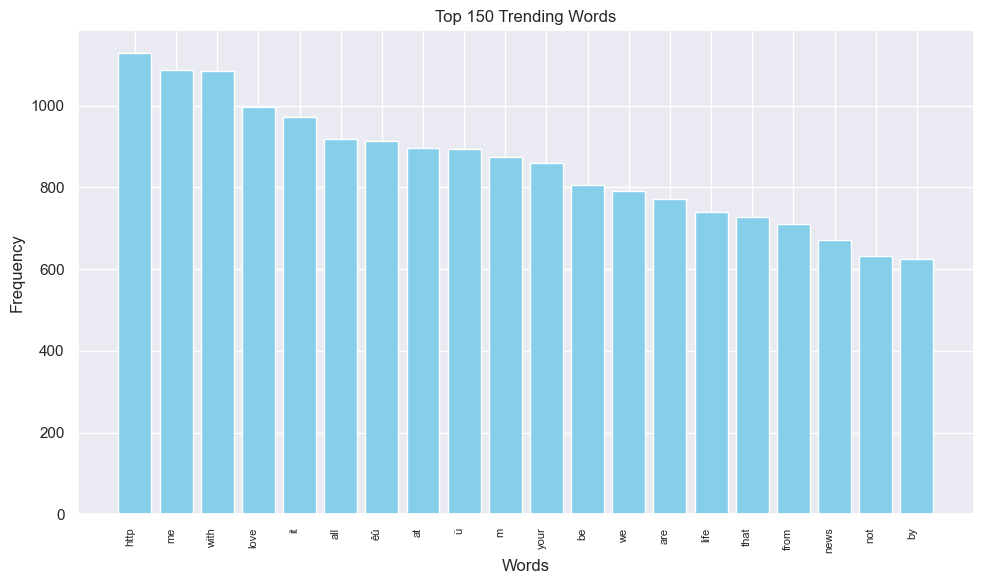

In [173]:
# Plot the top trending words
if trends:
    trends_sorted = sorted(trends, key=lambda x: x[1], reverse=True)[:20]
    words, counts = zip(*trends_sorted)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Trending Words')
    plt.xticks(rotation=90, ha='right', size = 8)
    plt.tight_layout()
    plt.show()


In [174]:
def extract_words(tweet):
    """
    Extract words from a tweet and preprocess them using NLTK.

    Args:
    - tweet: Input tweet (string).

    Returns:
    - List of preprocessed words.
    """
    # Convert tweet to lowercase
    tweet = tweet.lower()
    
    # Tokenize tweet
    words = word_tokenize(tweet)
    
    # Remove punctuation and stop words, and perform stemming
    words = [stemmer.stem(word) for word in words if word not in punctuation and word not in stop_words]
    
    return words

def detect_trends(tweets, threshold=3):
    """
    Detect trends or patterns based on tweets.

    Args:
    - tweets: List of tweets (strings).
    - threshold: Minimum count for a word to be considered a trend.

    Returns:
    - List of tuples containing trending words and their counts, ordered from highest count to lowest count.
    """
    all_words = []
    
    for tweet in tweets:
        words = extract_words(tweet)
        all_words.extend(words)

    word_counts = Counter(all_words)
    trending_words = [(word, count) for word, count in word_counts.items() if count >= threshold]

    # Sort the trending words based on the count in descending order
    trending_words.sort(key=lambda x: x[1], reverse=True)

    return trending_words

# Convert the 'description' column to strings and extract tweets
tweets = data['description'].apply(str).tolist()

In [175]:
trends = detect_trends(tweets)[:45]
if trends:
    print("Trending words:")
    for trend in trends:
        print(f"{trend[0]}: {trend[1]}")

Trending words:
none: 3759
http: 1530
love: 1213
's: 1204
'm: 792
life: 710
follow: 693
news: 657
n't: 618
...: 607
like: 544
tweet: 536
music: 532
fan: 522
live: 515
«: 472
û¢: 459
make: 447
world: 427
one: 406
sport: 392
time: 371
get: 358
twitter: 354
book: 350
writer: 349
best: 339
lover: 334
game: 332
thing: 328
..: 325
us: 324
||: 324
busi: 323
new: 306
//: 302
work: 298
market: 284
girl: 280
»: 277
god: 271
account: 262
free: 258
peopl: 255
go: 255


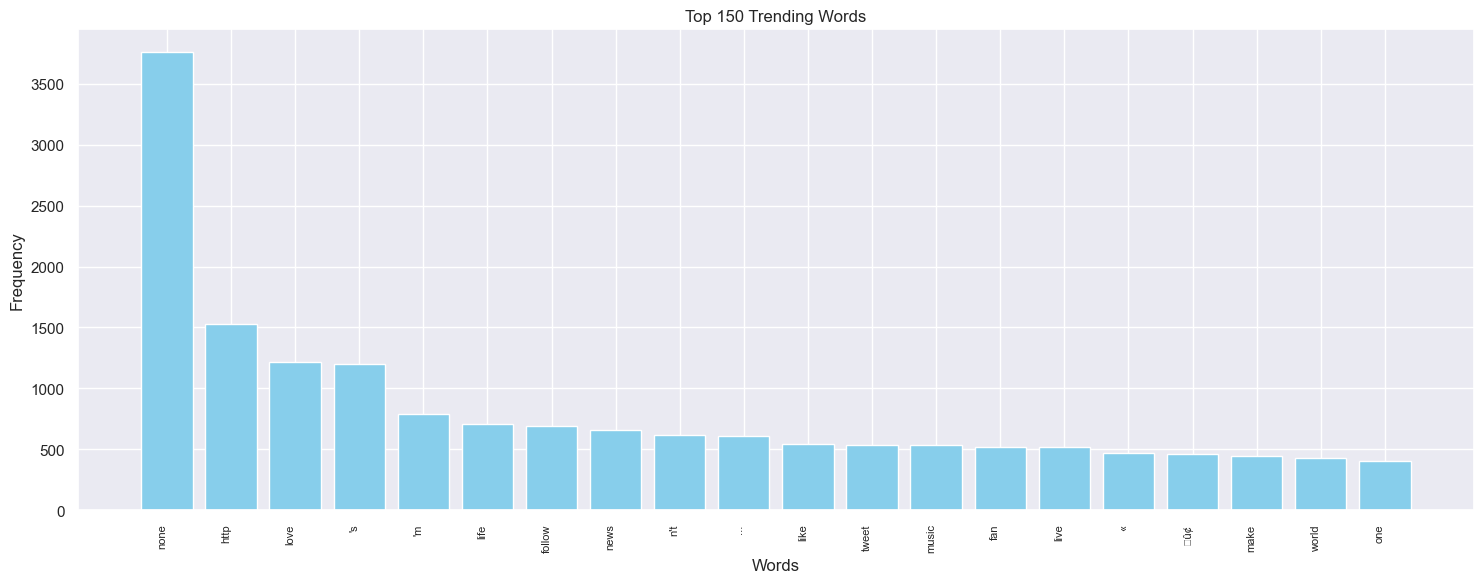

In [176]:
# Plot the top trending words
if trends:
    trends_sorted = sorted(trends, key=lambda x: x[1], reverse=True)[:20]
    words, counts = zip(*trends_sorted)
    plt.figure(figsize=(15, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 150 Trending Words')
    plt.xticks(rotation=90, ha='right', size = 8)
    plt.tight_layout()
    plt.show()